# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Audy Revi Nugraha]
- **Email:** [audyrev@gmail.com]
- **ID Dicoding:** [audyrev]


## Menentukan Pertanyaan Bisnis

- Apakah suhu mempengaruhi terhadap jumlah sepeda yang disewa?
- Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah sepeda yang disewa?

## Import Semua Packages/Library yang Digunakan

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

#### Gathering Data

In [32]:
day_df = pd.read_csv("../submission/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Assesing Data

Tabel day_df

In [33]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Missing Value

In [34]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate Value

In [35]:
print("Jumlah Duplikasi pada tabel day_df =", day_df.duplicated().sum())

Jumlah Duplikasi pada tabel day_df = 0


Invalid Value

In [36]:
invalid_temp = day_df[day_df['temp'] < 0]
print("Nilai invalid (negatif) di kolom 'temp':")
print(invalid_temp)

Nilai invalid (negatif) di kolom 'temp':
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [37]:
invalid_cnt = day_df[day_df['cnt'] < 0]
print("Nilai invalid (negatif) di kolom 'cnt':")
print(invalid_cnt)

Nilai invalid (negatif) di kolom 'cnt':
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Mengecek Tipe Data

In [38]:
print("Tipe data tiap kolom:")
print(day_df.dtypes)

Tipe data tiap kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Outlier

In [40]:
df_numeric = day_df.select_dtypes(include=['float64', 'int64'])

outliers = {}

for col in df_numeric.columns:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df_numeric[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)]

for col, outlier_data in outliers.items():
    print(f"Outlier ditemukan di kolom '{col}':")
    print(outlier_data)
    print("-" * 50)

Outlier ditemukan di kolom 'instant':
Empty DataFrame
Columns: [instant, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
Outlier ditemukan di kolom 'season':
Empty DataFrame
Columns: [instant, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
Outlier ditemukan di kolom 'yr':
Empty DataFrame
Columns: [instant, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
Outlier ditemukan di kolom 'mnth':
Empty DataFrame
Columns: [instant, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
Outlier ditemukan

In [41]:
# Mengidentifikasi apakah ada nilai yang bukan 0 atau 1 di kolom 'holiday'
invalid_holiday_values = day_df[~day_df['holiday'].isin([0, 1])]

print("Baris dengan nilai yang tidak valid di kolom 'holiday':")
print(invalid_holiday_values)

Baris dengan nilai yang tidak valid di kolom 'holiday':
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [42]:
# Mengecek distribusi nilai windspeeds
print(day_df['windspeed'].describe())

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64


In [43]:
# Mengecek distribusi nilai casual
print(day_df['casual'].describe())

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: casual, dtype: float64


#### Cleaning Data

Tabel day_df

Inaccurate Value

In [8]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [9]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Outlier

Outlier di Hum

In [44]:
# Mengganti 0 dengan NaN di kolom 'hum'
day_df['hum'] = day_df['hum'].replace(0, np.nan)

Outlier di Casual


In [45]:
# Menghitung persentil 95% untuk casual
perc_95 = day_df['casual'].quantile(0.95)
day_df['casual'] = day_df['casual'].clip(upper=perc_95)

## Exploratory Data Analysis (EDA)

#### Explore day_df

In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [11]:
day_df_group = day_df.groupby('dteday').agg({
    'cnt': 'mean',
    'weathersit': 'mean',
    'temp': 'mean',
    'atemp': 'mean',
    'windspeed': 'mean'
})

In [12]:
day_weather = day_df_group.corr()
print(day_weather)

                 cnt  weathersit      temp     atemp  windspeed
cnt         1.000000   -0.297391  0.627494  0.631066  -0.234545
weathersit -0.297391    1.000000 -0.120602 -0.121583   0.039511
temp        0.627494   -0.120602  1.000000  0.991702  -0.157944
atemp       0.631066   -0.121583  0.991702  1.000000  -0.183643
windspeed  -0.234545    0.039511 -0.157944 -0.183643   1.000000


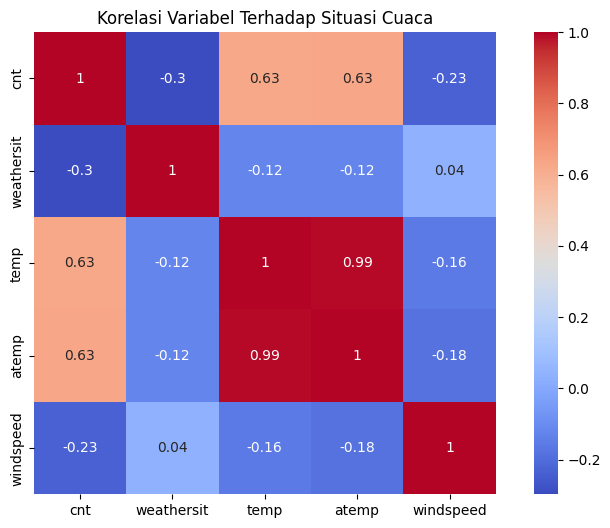

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(day_weather, annot=True, cmap='coolwarm', square=True)
plt.title('Korelasi Variabel Terhadap Situasi Cuaca')
plt.show()

In [14]:
day_df_group2 = day_df.groupby('dteday').agg({
    'cnt': 'mean',
    'workingday': 'mean',
    'holiday': 'mean'
})

In [15]:
day_work = day_df_group2.corr()
print(day_work)

                 cnt  workingday   holiday
cnt         1.000000    0.061156 -0.068348
workingday  0.061156    1.000000 -0.253023
holiday    -0.068348   -0.253023  1.000000


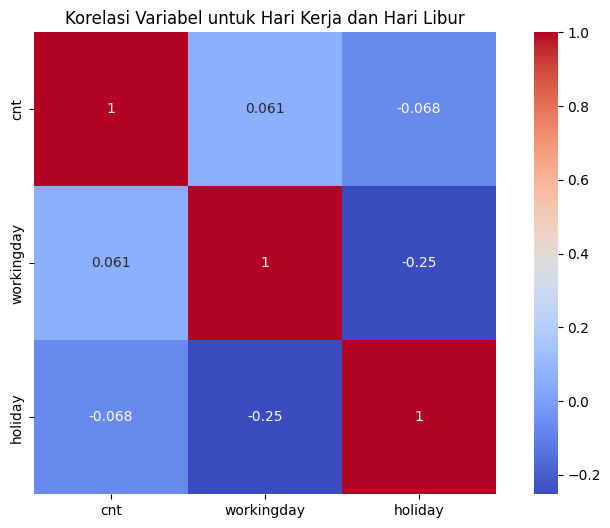

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(day_work, annot=True, cmap='coolwarm', square=True)
plt.title('Korelasi Variabel untuk Hari Kerja dan Hari Libur')
plt.show()

In [17]:
avg_by_workingday = day_df.groupby('workingday')['cnt'].mean().reset_index()
avg_by_holiday = day_df.groupby('holiday')['cnt'].mean().reset_index()

combined_avg = pd.DataFrame({
    'Type': ['Hari Kerja', 'Bukan Hari Kerja', 'Hari Libur', 'Bukan Hari Libur'],
    'Average_Cnt': [
        avg_by_workingday.loc[1, 'cnt'], 
        avg_by_workingday.loc[0, 'cnt'], 
        avg_by_holiday.loc[1, 'cnt'],     
        avg_by_holiday.loc[0, 'cnt']       
    ]
})

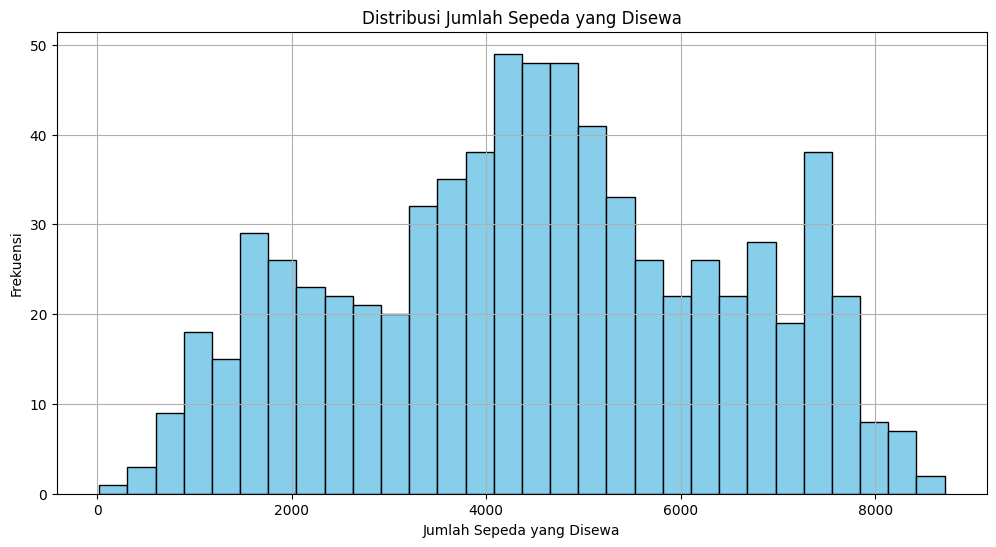

In [52]:
plt.figure(figsize=(12, 6))
day_df['cnt'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Sepeda yang Disewa')
plt.xlabel('Jumlah Sepeda yang Disewa')
plt.ylabel('Frekuensi')
plt.show()

/var/folders/g8/jbmlmdts08sdw16w3hyqf4900000gn/T/ipykernel_2372/2840575753.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='holiday', data=day_df, palette='Set2')


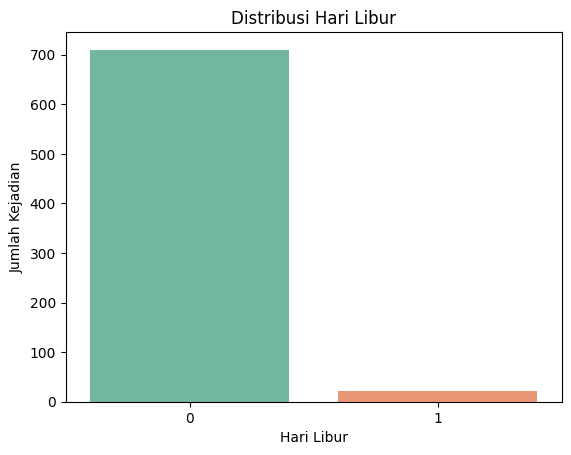

In [53]:
sns.countplot(x='holiday', data=day_df, palette='Set2')
plt.title('Distribusi Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Kejadian')
plt.show()

<Figure size 1000x600 with 0 Axes>

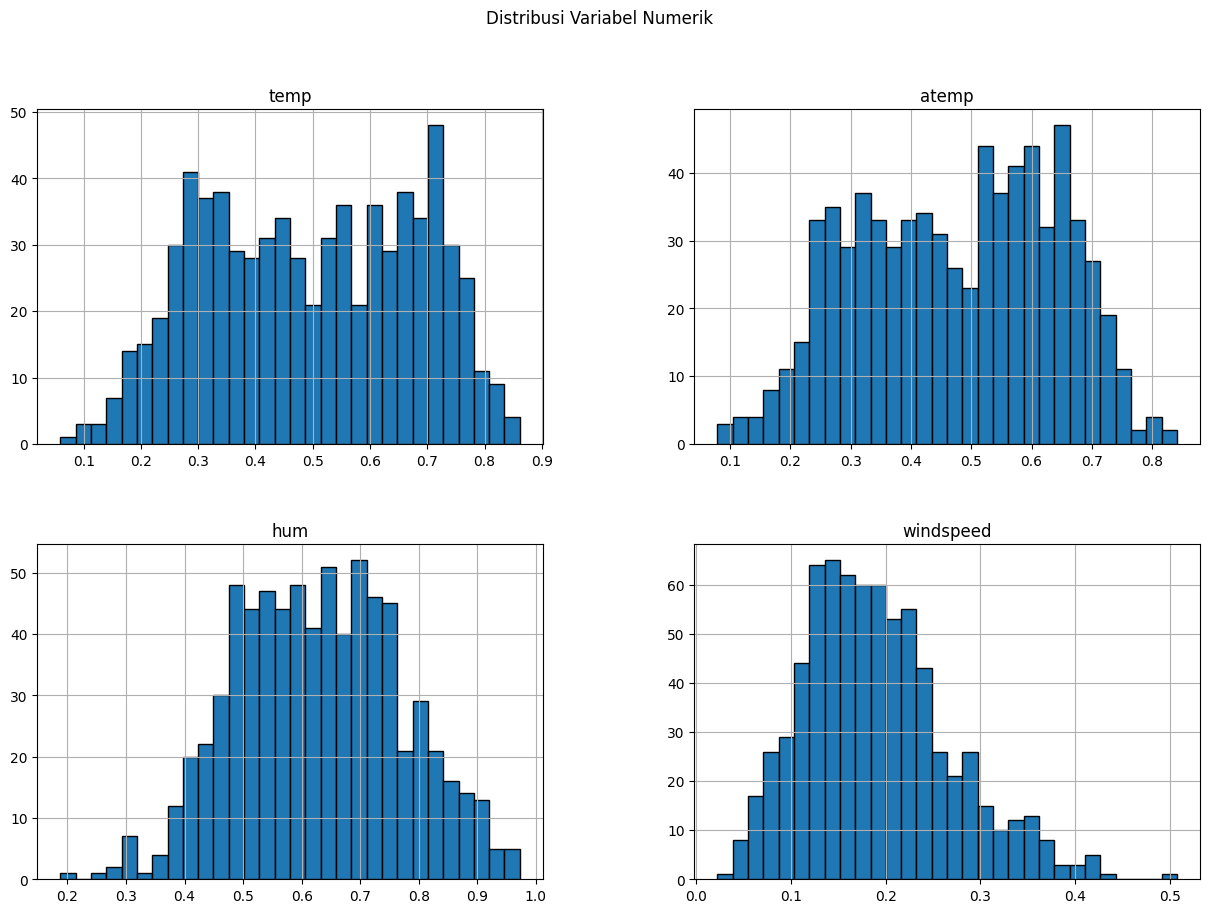

In [56]:
plt.figure(figsize=(10, 6))
day_df[['temp', 'atemp', 'hum', 'windspeed']].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

/var/folders/g8/jbmlmdts08sdw16w3hyqf4900000gn/T/ipykernel_2372/564942799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=day_df, palette='Set1')


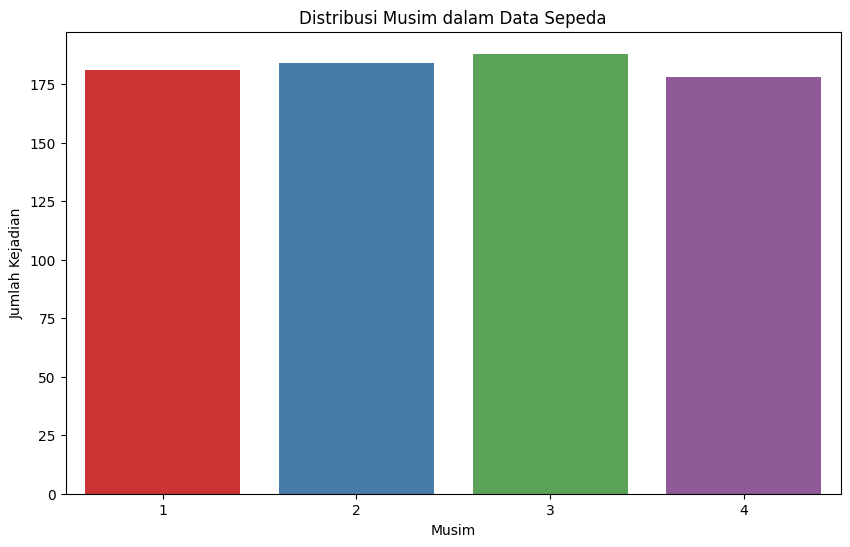

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=day_df, palette='Set1')
plt.title('Distribusi Musim dalam Data Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Kejadian')
plt.show()

/var/folders/g8/jbmlmdts08sdw16w3hyqf4900000gn/T/ipykernel_2372/3026154357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weathersit', data=day_df, palette='Set2')


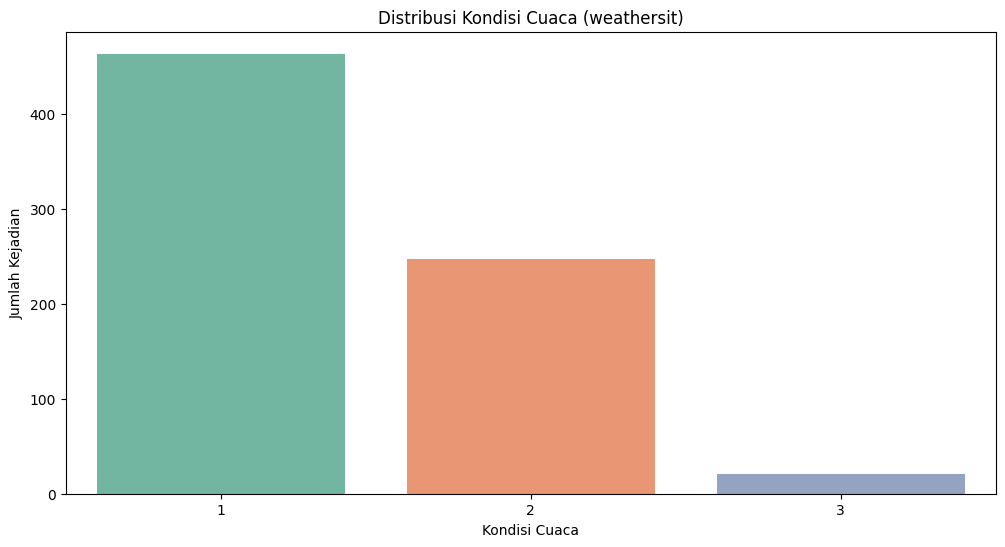

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(x='weathersit', data=day_df, palette='Set2')
plt.title('Distribusi Kondisi Cuaca (weathersit)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Kejadian')
plt.show()

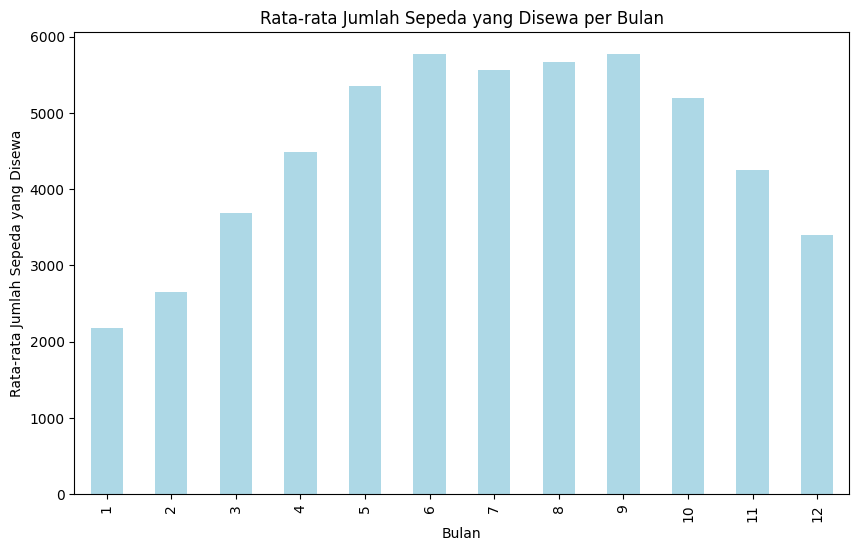

In [60]:
monthly_avg = day_df.groupby('mnth')['cnt'].mean()
monthly_avg.plot(kind='bar', figsize=(10, 6), color='lightblue')
plt.title('Rata-rata Jumlah Sepeda yang Disewa per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Apakah faktor yang mempengaruhi dalam jumlah sepeda yang disewa?

In [63]:
correlations = day_weather[['cnt', 'weathersit', 'temp', 'atemp', 'windspeed']].corr()['cnt'].drop('cnt')

sorted_correlations = correlations.abs().sort_values(ascending=False)

print("Variabel dengan korelasi terkuat terhadap Penggunaan Sepeda:")
print(sorted_correlations)

Variabel dengan korelasi terkuat terhadap Penggunaan Sepeda:
atemp         0.863281
temp          0.861197
weathersit    0.776387
windspeed     0.714200
Name: cnt, dtype: float64


/var/folders/g8/jbmlmdts08sdw16w3hyqf4900000gn/T/ipykernel_2372/2177581904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, palette='coolwarm')


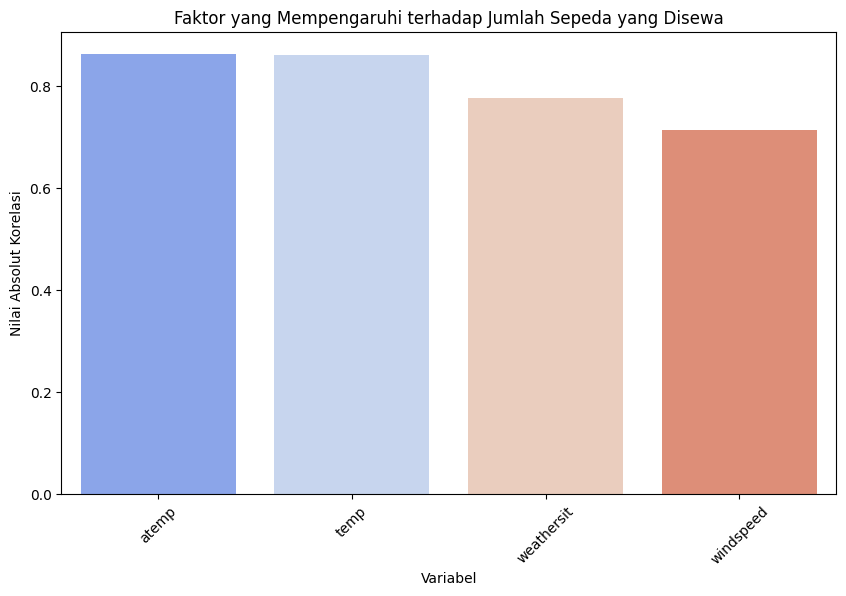

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, palette='coolwarm')
plt.title("Faktor yang Mempengaruhi terhadap Jumlah Sepeda yang Disewa")
plt.xlabel("Variabel")
plt.ylabel("Nilai Absolut Korelasi")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:
Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah sepeda yang disewa?

/var/folders/g8/jbmlmdts08sdw16w3hyqf4900000gn/T/ipykernel_2372/603037507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_avg, x='Type', y='Average_Cnt', palette='Set2')


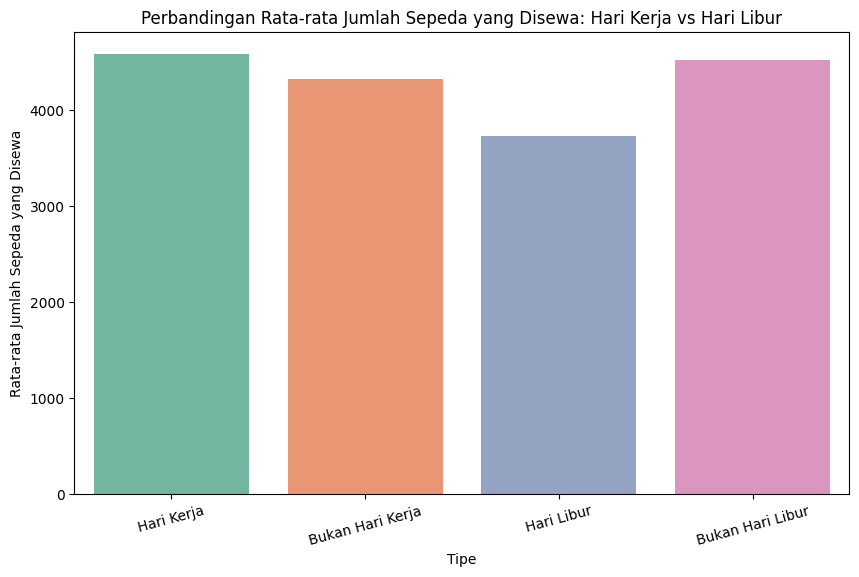

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_avg, x='Type', y='Average_Cnt', palette='Set2')
plt.title("Perbandingan Rata-rata Jumlah Sepeda yang Disewa: Hari Kerja vs Hari Libur")
plt.xlabel("Tipe")
plt.ylabel("Rata-rata Jumlah Sepeda yang Disewa")
plt.xticks(rotation=15)
plt.show()

### Kesimpulan

Cuaca dan suhu yang nyaman adalah faktor penting dalam merancang program bike sharing ini. Misalnya, di hari-hari dengan suhu moderat atau cerah, jumlah penyewaan sepeda kemungkinan akan lebih tinggi.
Penyewaan sepeda dapat dipromosikan lebih banyak pada hari dengan suhu yang lebih tinggi dan kondisi cuaca yang baik. Selain itu, bahwa pada hari kerja, lebih banyak sepeda disewa, kemungkinan besar karena penggunaan sepeda untuk keperluan transportasi sehari-hari (ke kantor, sekolah, dll.).

In [61]:
day_df.to_csv("main_data.csv", index=False)